<a href="https://colab.research.google.com/github/JoonhyeonKim/Fun_with_practicing_DS/blob/main/MultiClassification_task_with_odddata.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Import dependencies
import torch
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.model_selection import train_test_split

In [2]:
#Set the hyperparameters for data creation
NUM_CLASSES = 4
NUM_FEATURES = 3
RANDOM_SEED = 42

In [3]:
# 1. Create multi-class data
X_, y_ = make_blobs(n_samples=1000,
                            n_features=NUM_FEATURES, # X features
                            centers=NUM_CLASSES, # y labels
                            cluster_std = 1.5, # give the clusters a little shake up (try changing this to 1.0, the default)
                            random_state = RANDOM_SEED
)


In [4]:
# Code for creating a spiral dataset from CS231n


In [5]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D  # Import the 3D plotting toolkit

RANDOM_SEED = 42
np.random.seed(RANDOM_SEED)

N = 250  # number of points per class
D = 3  # dimensionality
K = 4  # number of classes

X = np.zeros((N*K, D))  # data matrix (each row = single example)
y = np.zeros(N*K, dtype='uint8')  # class labels

for j in range(K):
    ix = range(N*j, N*(j+1))
    r = np.linspace(0.0, 1, N)  # radius
    t = np.linspace(j*4, (j+1)*4, N) + np.random.randn(N)*0.2  # theta
    X[ix] = np.c_[r*np.sin(t), r*np.cos(t), r*np.sin(t)*np.cos(t)]
    y[ix] = j

In [6]:
X = X_ + X


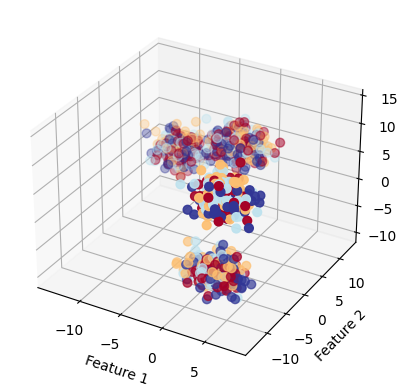

In [7]:


# Create a 3D scatter plot
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')  # Add a 3D subplot

# Scatter plot using all three dimensions
ax.scatter(X[:, 0], X[:, 1], X[:, 2], c=y, s=40, cmap=plt.cm.RdYlBu)

ax.set_xlabel('Feature 1')
ax.set_ylabel('Feature 2')
ax.set_zlabel('Feature 3')

plt.show()


In [8]:
def accuracy_fn(y_true, y_pred):
  correct = torch.eq(y_true, y_pred).sum().item() # torch.eq() calculates where two tensors are equal
  acc = (correct / len(y_pred)) * 100 # how much of right ones are there
  return acc

In [9]:
print(X[:12], y[:12])


[[ -8.71466813   5.13719567   1.55848662]
 [  3.00641092 -11.52846932   8.71396927]
 [  1.85938625  -8.4451997   10.31817625]
 [ -5.21524167   8.51173548   1.99731622]
 [  4.52677203  -6.5024356   -2.97730504]
 [ -2.8819714   10.49171161   5.60861483]
 [ -2.35006632   8.28115049   2.32272922]
 [ -5.08918605   8.19797904   3.12776075]
 [  4.66611852  -7.62393488  -6.54331629]
 [ -2.32415605  10.9657766    3.76128393]
 [ -7.82674003  10.21341376   1.8260705 ]
 [-10.6513985    8.46369166   2.04738412]] [0 0 0 0 0 0 0 0 0 0 0 0]


In [10]:
X = torch.from_numpy(X).type(torch.float)
y = torch.from_numpy(y).type(torch.LongTensor)

In [11]:
# 3. Split into train and test sets

X_train, X_test, y_train, y_test = train_test_split(X,
                                                                        y,
                                                                        test_size=0.2,
                                                                        random_state=RANDOM_SEED)

In [12]:
X_train.size()


torch.Size([800, 3])

In [13]:
device = "cuda" if torch.cuda.is_available() else "cpu"
print(device)

cuda


In [14]:
from torch import nn


In [15]:
# Build model
class MultiModel(nn.Module):
  def __init__(self, input_features, output_features, hidden_units=8):
    super().__init__()
    self.linear_1 = nn.Linear(in_features=input_features, out_features=hidden_units)
    self.linear_2 = nn.Linear(in_features=hidden_units, out_features=hidden_units)
    self.linear_3 = nn.Linear(in_features=hidden_units, out_features=hidden_units)
    self.linear_4 = nn.Linear(in_features=hidden_units, out_features=output_features)
    self.relu = nn.ReLU()

  def forward(self, x):
    z = self.linear_1(x)
    z = self.relu(z)
    z = self.linear_2(z)
    z = self.relu(z)
    z = self.linear_3(z)
    z = self.relu(z)
    z = self.linear_4(z)

    return z

In [16]:
model = MultiModel(input_features=3, # initial features
                   output_features=4,
                   hidden_units=100) # output classes


In [17]:
model = model.to(device)


In [18]:
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(params=model.parameters(),
                            lr=0.01)


In [19]:
model(X_train.to(device))[:6]
# logits displayed

tensor([[ 0.0808, -0.2822, -0.0088, -0.1094],
        [ 0.1888, -0.1403, -0.0150,  0.0858],
        [ 0.2866, -0.3641,  0.2455, -0.0348],
        [ 0.3152, -0.3705,  0.2540, -0.0690],
        [ 0.1942, -0.1458, -0.0239,  0.1018],
        [ 0.1431, -0.0878, -0.0112,  0.0532]], device='cuda:0',
       grad_fn=<SliceBackward0>)

In [20]:
model(X_train.to(device))[0].shape, NUM_CLASSES


(torch.Size([4]), 4)

In [21]:
y_logits = model(X_train.to(device))
y_probs = torch.softmax(y_logits, dim=1)
print(y_logits[:6])
print(y_probs[:6])

tensor([[ 0.0808, -0.2822, -0.0088, -0.1094],
        [ 0.1888, -0.1403, -0.0150,  0.0858],
        [ 0.2866, -0.3641,  0.2455, -0.0348],
        [ 0.3152, -0.3705,  0.2540, -0.0690],
        [ 0.1942, -0.1458, -0.0239,  0.1018],
        [ 0.1431, -0.0878, -0.0112,  0.0532]], device='cuda:0',
       grad_fn=<SliceBackward0>)
tensor([[0.2910, 0.2024, 0.2661, 0.2406],
        [0.2909, 0.2093, 0.2373, 0.2625],
        [0.3119, 0.1627, 0.2993, 0.2261],
        [0.3200, 0.1612, 0.3010, 0.2179],
        [0.2918, 0.2077, 0.2346, 0.2660],
        [0.2805, 0.2227, 0.2404, 0.2564]], device='cuda:0',
       grad_fn=<SliceBackward0>)


In [22]:
# sum the row's values
torch.sum(y_probs[0])

tensor(1.0000, device='cuda:0', grad_fn=<SumBackward0>)

In [23]:
print(y_probs[0])
print(y_probs[0].argmax())

tensor([0.2910, 0.2024, 0.2661, 0.2406], device='cuda:0',
       grad_fn=<SelectBackward0>)
tensor(0, device='cuda:0')


In [24]:
torch.manual_seed(42)
epochs = 10000

In [25]:
X_train, X_test, y_train, y_test = \
X_train.to(device), X_test.to(device), \
y_train.to(device), y_test.to(device)


In [26]:
for epoch in range(epochs):
  model.train()

  y_logits = model(X_train)
  y_probs = torch.softmax(y_logits, dim=1)
  y_pred = y_probs.argmax(dim=1)

  loss = loss_fn(y_logits, y_train)
  acc = accuracy_fn(y_true=y_train,
                    y_pred=y_pred)

  optimizer.zero_grad()

  loss.backward()

  optimizer.step()

  model.eval()
  with torch.inference_mode():
    test_logits = model(X_test)
    test_probs = torch.softmax(test_logits, dim=1)
    test_pred = test_probs.argmax(dim=1)

    test_loss = loss_fn(test_logits, y_test)
    test_acc = accuracy_fn(y_true=y_test,
                           y_pred=test_pred)

  if epoch % 100 == 0:
    print(f"Epoch: {epoch} | Loss: {loss:.5f}, Acc: {acc:.2f}% | Test Loss: {test_loss:.5f}, Test Acc: {test_acc:.2f}%")


Epoch: 0 | Loss: 1.39474, Acc: 25.87% | Test Loss: 1.40297, Test Acc: 21.50%
Epoch: 100 | Loss: 1.37993, Acc: 28.88% | Test Loss: 1.39003, Test Acc: 26.00%
Epoch: 200 | Loss: 1.37757, Acc: 29.62% | Test Loss: 1.39060, Test Acc: 24.50%
Epoch: 300 | Loss: 1.37566, Acc: 30.12% | Test Loss: 1.39089, Test Acc: 23.50%
Epoch: 400 | Loss: 1.37398, Acc: 31.00% | Test Loss: 1.39105, Test Acc: 24.50%
Epoch: 500 | Loss: 1.37260, Acc: 31.37% | Test Loss: 1.39078, Test Acc: 24.50%
Epoch: 600 | Loss: 1.37126, Acc: 30.88% | Test Loss: 1.39052, Test Acc: 24.00%
Epoch: 700 | Loss: 1.36993, Acc: 31.00% | Test Loss: 1.39018, Test Acc: 25.50%
Epoch: 800 | Loss: 1.36865, Acc: 30.88% | Test Loss: 1.38999, Test Acc: 25.50%
Epoch: 900 | Loss: 1.36738, Acc: 31.62% | Test Loss: 1.38975, Test Acc: 26.00%
Epoch: 1000 | Loss: 1.36615, Acc: 32.62% | Test Loss: 1.38949, Test Acc: 25.50%
Epoch: 1100 | Loss: 1.36496, Acc: 32.75% | Test Loss: 1.38923, Test Acc: 26.50%
Epoch: 1200 | Loss: 1.36378, Acc: 33.00% | Test Loss

In [27]:
# Plot the model predictions
import numpy as np

def plot_decision_boundary(model, X, y):

    # Put everything to CPU (works better with NumPy + Matplotlib)
    model.to("cpu")
    X, y = X.to("cpu"), y.to("cpu")

    # Source - https://madewithml.com/courses/foundations/neural-networks/
    # (with modifications)
    x_min, x_max = X[:, 0].min() - 0.1, X[:, 0].max() + 0.1
    y_min, y_max = X[:, 1].min() - 0.1, X[:, 1].max() + 0.1
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 101),
                         np.linspace(y_min, y_max, 101))

    # Make features
    X_to_pred_on = torch.from_numpy(np.column_stack((xx.ravel(), yy.ravel()))).float()

    # Make predictions
    model.eval()
    with torch.inference_mode():
        y_logits = model(X_to_pred_on)

    # Test for multi-class or binary and adjust logits to prediction labels
    if len(torch.unique(y)) > 2:
        y_pred = torch.softmax(y_logits, dim=1).argmax(dim=1) # mutli-class
    else:
        y_pred = torch.round(torch.sigmoid(y_logits)) # binary

    # Reshape preds and plot
    y_pred = y_pred.reshape(xx.shape).detach().numpy()
    plt.contourf(xx, yy, y_pred, cmap=plt.cm.RdYlBu, alpha=0.7)
    plt.scatter(X[:, 0], X[:, 1], c=y, s=40, cmap=plt.cm.RdYlBu)
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())

In [28]:
import numpy as np
import matplotlib.pyplot as plt
import torch

def plot_decision_boundary_3d(model, X, y):
    model.to("cpu")
    X, y = X.cpu(), y.cpu()

    # Define the grid range based on X's feature ranges
    x_min, x_max = X[:, 0].min() - 0.1, X[:, 0].max() + 0.1
    y_min, y_max = X[:, 1].min() - 0.1, X[:, 1].max() + 0.1
    z_values = np.linspace(X[:, 2].min() - 0.1, X[:, 2].max() + 0.1, num=3)  # Choose 3 slices for visualization

    for z in z_values:
        xx, yy = np.meshgrid(np.linspace(x_min, x_max, 101),
                             np.linspace(y_min, y_max, 101))
        zz = np.full(xx.shape, z)

        # Prepare the grid points for prediction
        grid_points = torch.from_numpy(np.c_[xx.ravel(), yy.ravel(), zz.ravel()]).float()

        # Predict on the grid
        model.eval()
        with torch.no_grad():
            logits = model(grid_points)
            if len(torch.unique(y)) > 2:  # Multiclass classification
                preds = torch.softmax(logits, dim=1).argmax(dim=1)
            else:  # Binary classification
                preds = torch.round(torch.sigmoid(logits))

        # Reshape the predictions back to the grid shape
        Z = preds.view(xx.shape).numpy()

        # Plot the contour and training points
        plt.figure(figsize=(10, 6))
        plt.contourf(xx, yy, Z, alpha=0.7, cmap=plt.cm.RdYlBu)
        plt.scatter(X[:, 0], X[:, 1], c=y, s=40, cmap=plt.cm.RdYlBu, edgecolors='k')
        plt.title(f"Decision boundary at Z={z:.2f}")
        plt.xlabel("X1")
        plt.ylabel("X2")
        plt.show()

# Note: This function assumes 'model' is your trained model, and 'X' and 'y' are your data tensors.
# Ensure 'X' is a tensor with 3 features per instance and 'y' contains your labels.


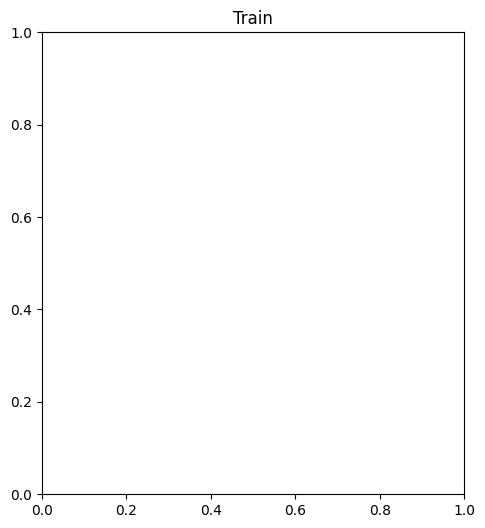

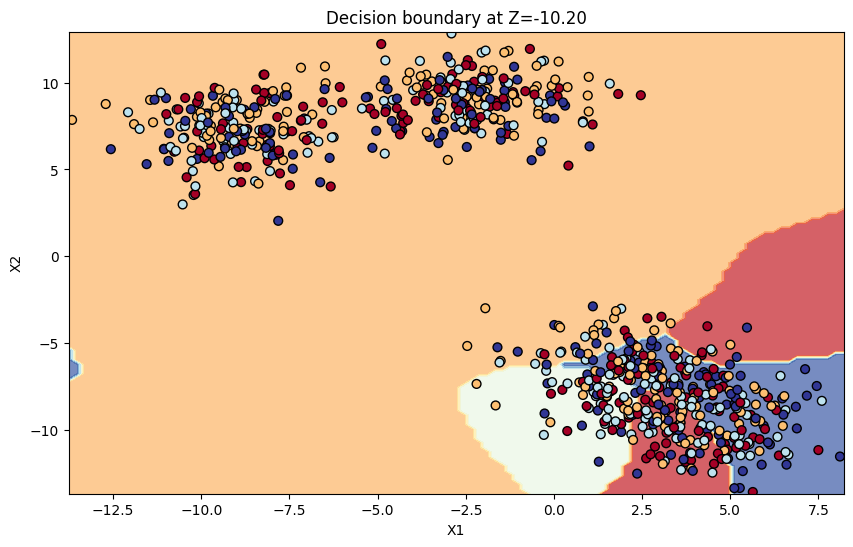

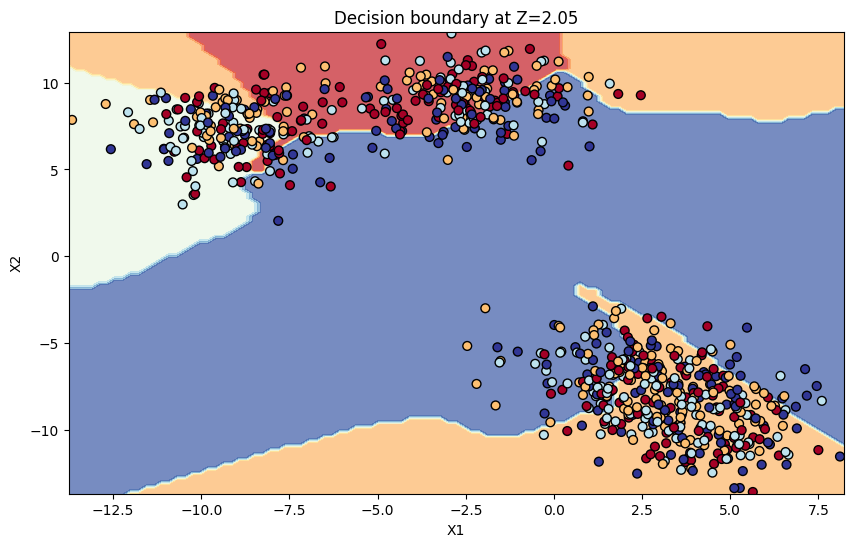

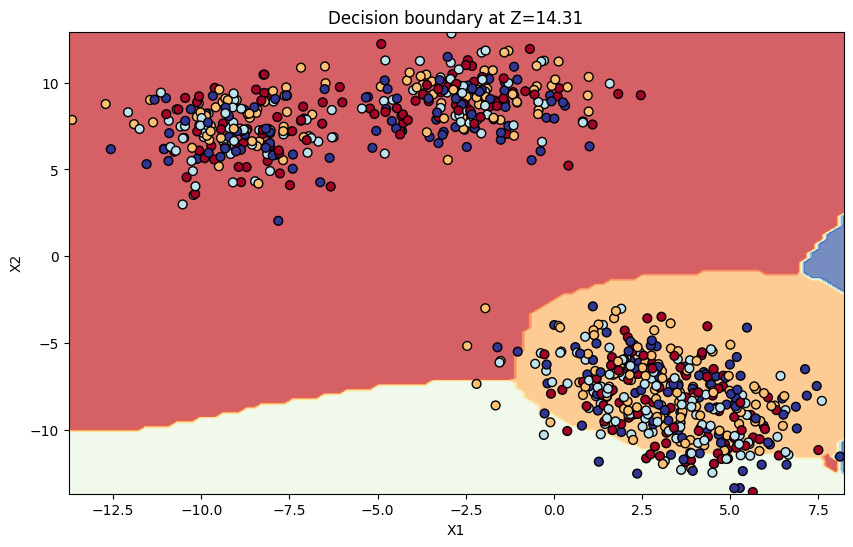

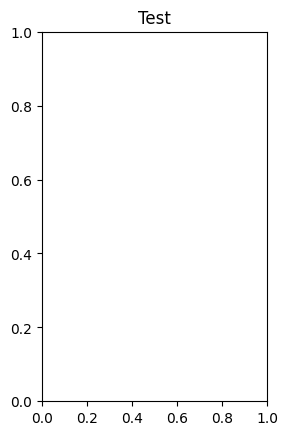

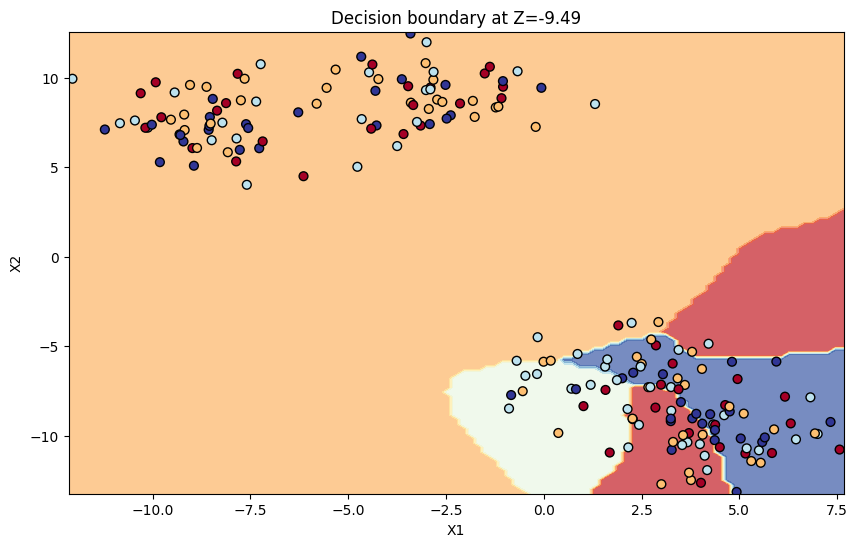

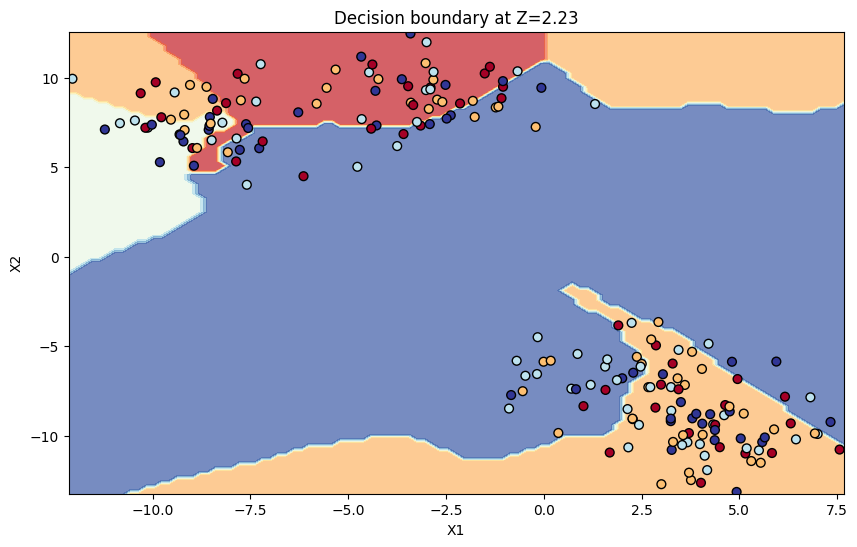

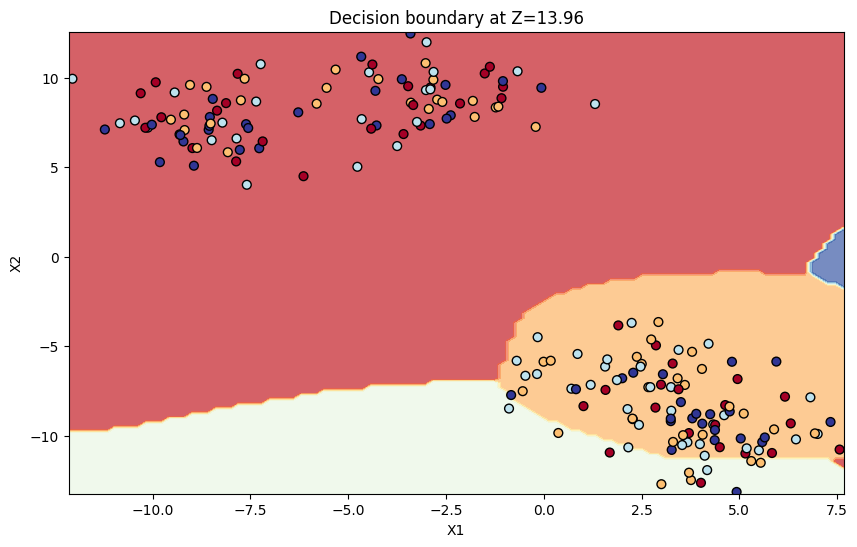

In [29]:
# Plot decision boundaries for training and test sets
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title("Train")
plot_decision_boundary_3d(model, X_train, y_train)
plt.subplot(1, 2, 2)
plt.title("Test")
plot_decision_boundary_3d(model, X_test, y_test)